In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,employer_provided,min_salary,max_salary,avg_salary,company_txt,age,python_yn,SQL_yn,R_yn,excel_yn,aws_yn
0,DATA SCIENTIST,₹3L - ₹7L (Glassdoor Est.),The required skills are :\nPost graduate degre...,3.4,Tech27 Systems Ltd.\n3.4,Calicut,-1,-1,-1,Company - Private,Computer Hardware Development,Information Technology,Unknown / Non-Applicable,-1,0,3.00,7.00,5.0,Tech27 Systems Ltd.\n,-1,1,0,0,0,0
1,Data Scientist,Employer Provided Salary:₹0.25L - ₹0.35L,1. Undertake to preprocess of structured and u...,-1.0,Radome Technologies & Services Pvt Ltd,Bangalore,-1,-1,-1,-1,-1,-1,-1,-1,1,0.25,0.35,0.3,Radome Technologies & Services Pvt Ltd,-1,0,0,0,0,0
2,Data Scientist 4,₹7L - ₹8L (Glassdoor Est.),#Li-Post\nHP is the world’s leading personal s...,4.2,HP\n4.2,Bangalore,-1,-1,1939,Company - Public,Computer Hardware Development,Information Technology,Unknown / Non-Applicable,-1,0,7.00,8.00,7.5,HP\n,84,0,0,0,0,0
3,Data Scientist,Employer Provided Salary:₹6L - ₹15L,We are looking for a Data Scientist to analyze...,-1.0,weholds and care holding pvt ltd,Bangalore,-1,-1,-1,-1,-1,-1,-1,-1,1,6.00,15.00,10.5,weholds and care holding pvt ltd,-1,0,0,0,0,0
4,Data Scientist,Employer Provided Salary:₹6L - ₹15L,We are looking for a Data Scientist to analyze...,-1.0,weholds and care holding pvt ltd,Bangalore,-1,-1,-1,-1,-1,-1,-1,-1,1,6.00,15.00,10.5,weholds and care holding pvt ltd,-1,0,0,0,0,0


In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'SQL_yn', 'R_yn', 'excel_yn',
       'aws_yn'],
      dtype='object')

In [42]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'


#JOb title and seniority

#Fix s

In [43]:
df['job_simp_col'] = df['Job Title'].apply(title_simplifier)
df.job_simp_col.value_counts()

data scientist    121
na                 52
mle                21
analyst            12
Name: job_simp_col, dtype: int64

In [44]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        183
senior     16
jr          7
Name: seniority, dtype: int64

In [45]:
# Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       731
1       513
2       509
3       635
4       635
       ... 
201     941
202     401
203    1009
204     323
205     243
Name: desc_len, Length: 206, dtype: int64

In [46]:
# Uncomment when you have competitors in the data
# df['n_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != "-1" else 0)

In [47]:
#Uncomment when there is a hourly wage salary present in the scrapped data

#hourly wage to annual
# df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [48]:
df.company_txt = df.company_txt.apply(lambda x: x.replace('\n',''))
df.company_txt

0                         Tech27 Systems Ltd.
1      Radome Technologies & Services Pvt Ltd
2                                          HP
3            weholds and care holding pvt ltd
4            weholds and care holding pvt ltd
                        ...                  
201                        Nexus pro services
202                              Airtel India
203                                   Datahut
204                                  SMEClabs
205                          Karanji Infotech
Name: company_txt, Length: 206, dtype: object

In [49]:
df.describe()

,Rating,Headquarters,Size,Founded,Competitors,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,SQL_yn,R_yn,excel_yn,aws_yn,desc_len
count,206.000000,206.0,206.0,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.0,206.000000,206.000000,206.000000
mean,2.566019,-1.0,-1.0,1280.873786,-1.0,0.514563,4.848447,8.946311,6.897379,24.529126,0.266990,0.0,0.0,0.135922,0.063107,982.970874
std,2.138614,0.0,0.0,953.492166,0.0,0.501005,4.702507,6.415640,5.346451,56.570669,0.443465,0.0,0.0,0.343541,0.243747,1001.127306
min,-1.000000,-1.0,-1.0,-1.000000,-1.0,0.000000,0.100000,0.150000,0.125000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,132.000000
25%,-1.000000,-1.0,-1.0,-1.000000,-1.0,0.000000,2.000000,6.000000,4.500000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,465.000000
50%,3.500000,-1.0,-1.0,1985.000000,-1.0,1.000000,4.000000,7.000000,5.500000,6.000000,0.000000,0.0,0.0,0.000000,0.000000,658.500000
75%,4.000000,-1.0,-1.0,2017.000000,-1.0,1.000000,6.750000,10.000000,9.000000,8.000000,1.000000,0.0,0.0,0.000000,0.000000,1001.250000
max,5.000000,-1.0,-1.0,2019.000000,-1.0,1.000000,35.000000,36.000000,35.000000,333.000000,1.000000,0.0,0.0,1.000000,1.000000,5627.000000


<AxesSubplot:>

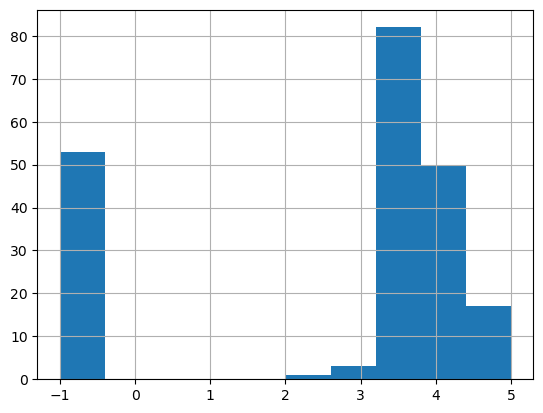

In [50]:
df.Rating.hist()

<AxesSubplot:>

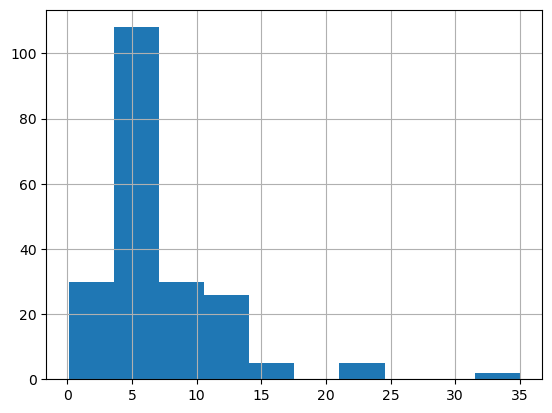

In [51]:
df.avg_salary.hist()

<AxesSubplot:>

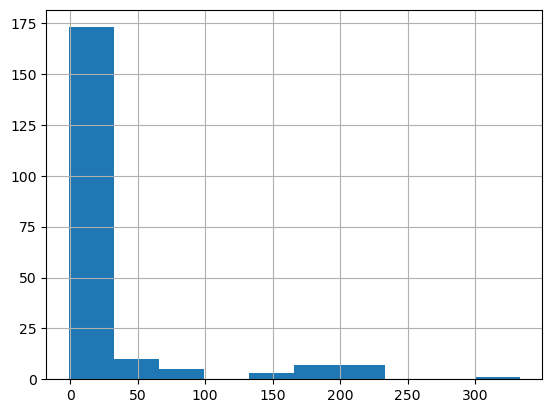

In [52]:
df.age.hist()

<AxesSubplot:>

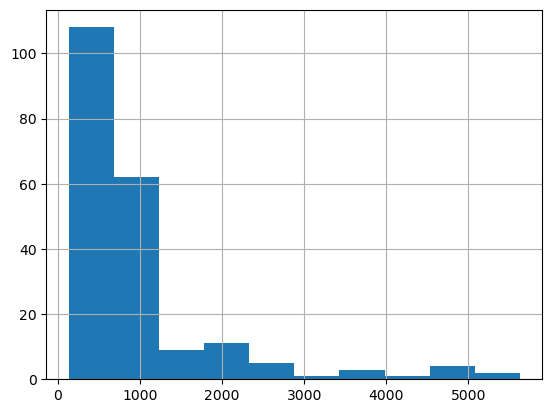

In [53]:
df.desc_len.hist()

<AxesSubplot:>

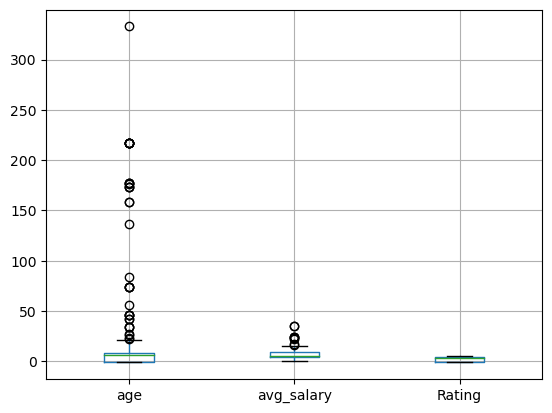

In [54]:
df.boxplot(column=['age','avg_salary','Rating'])

<AxesSubplot:>

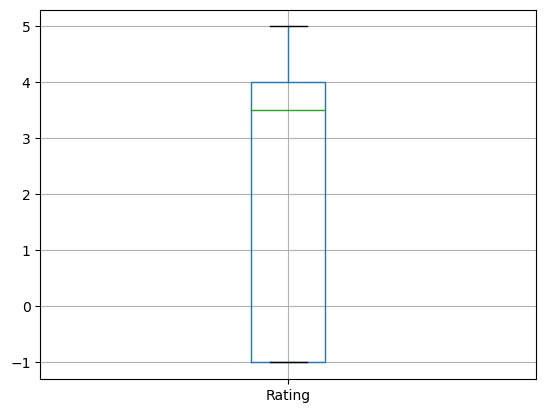

In [55]:
df.boxplot('Rating')

In [56]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.102096,0.315897,-0.016743
avg_salary,-0.102096,1.000000,0.056063,-0.090456
Rating,0.315897,0.056063,1.000000,0.205431
desc_len,-0.016743,-0.090456,0.205431,1.000000


<AxesSubplot:>

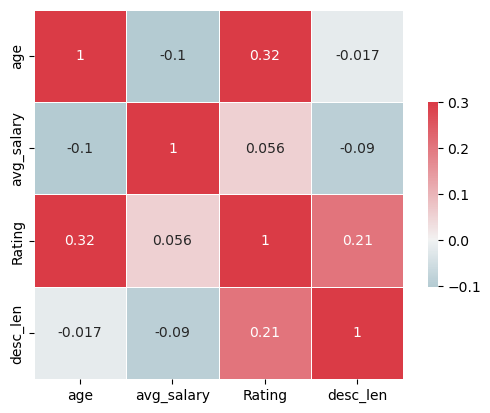

In [57]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=0.3,center=0, cmap=cmap,annot=True,
                                                                square=True,linewidths=0.5,cbar_kws={"shrink": .5})

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'SQL_yn', 'R_yn', 'excel_yn',
       'aws_yn', 'job_simp_col', 'seniority', 'desc_len'],
      dtype='object')

In [60]:
df_cat = df[['Location','Size','Type of ownership','Industry','Sector','Revenue','company_txt','python_yn', 'SQL_yn', 'R_yn', 
            'excel_yn','aws_yn', 'job_simp_col','seniority']]

graph for Location: total = 21


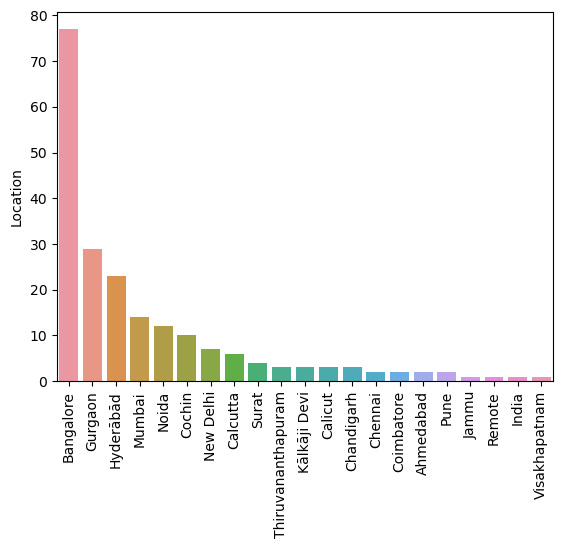

graph for Size: total = 1


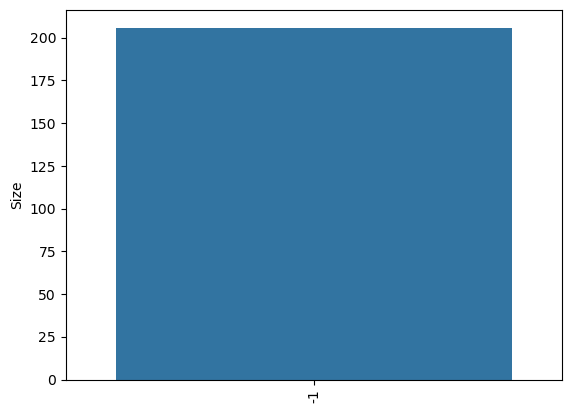

graph for Type of ownership: total = 4


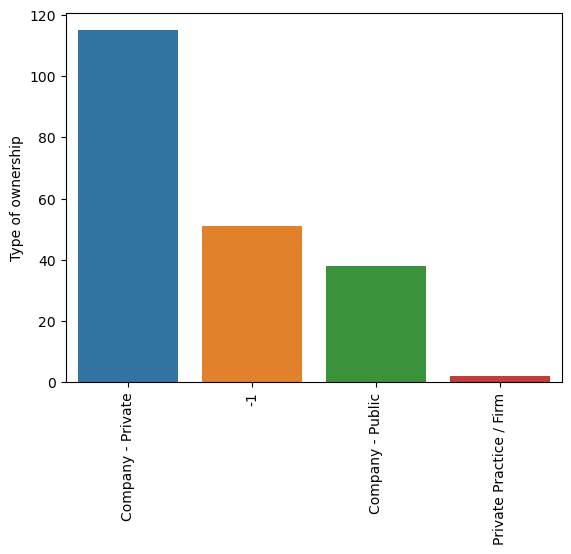

graph for Industry: total = 20


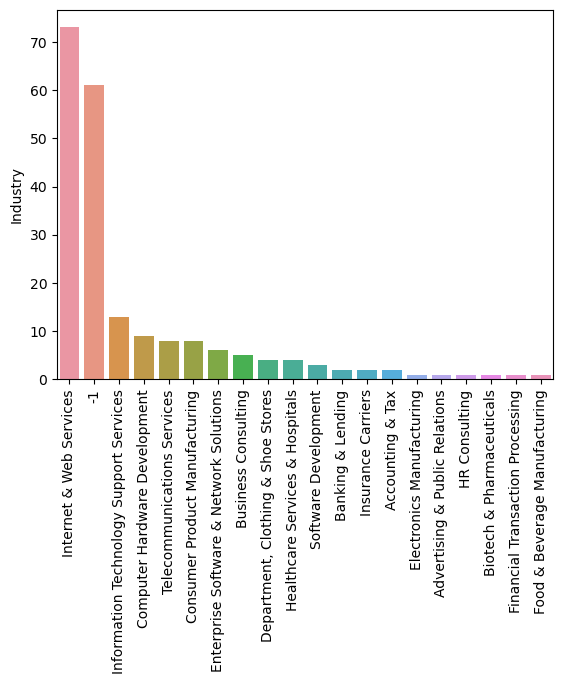

graph for Sector: total = 12


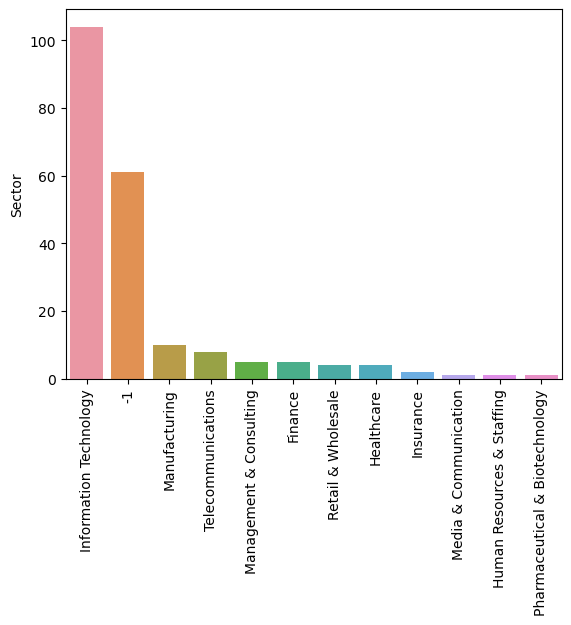

graph for Revenue: total = 8


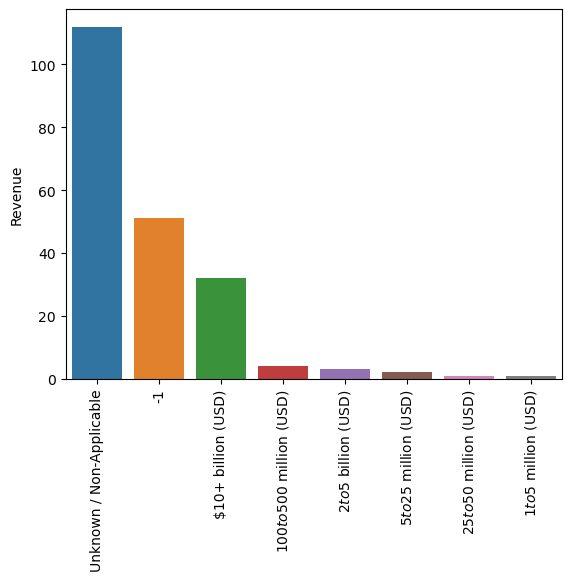

graph for company_txt: total = 101


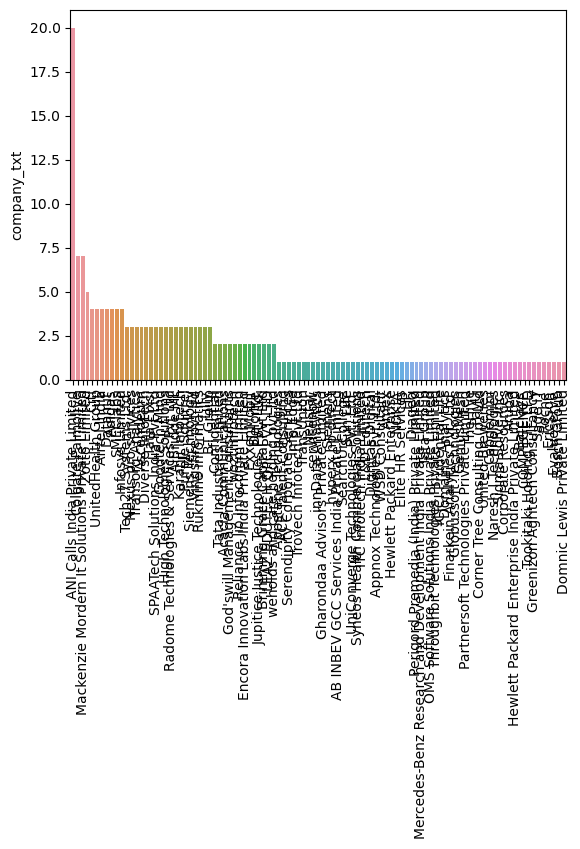

graph for python_yn: total = 2


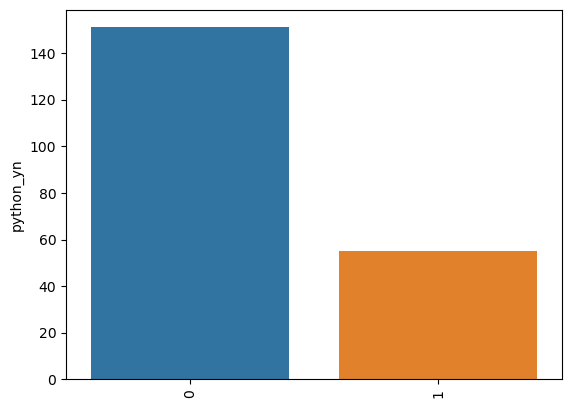

graph for SQL_yn: total = 1


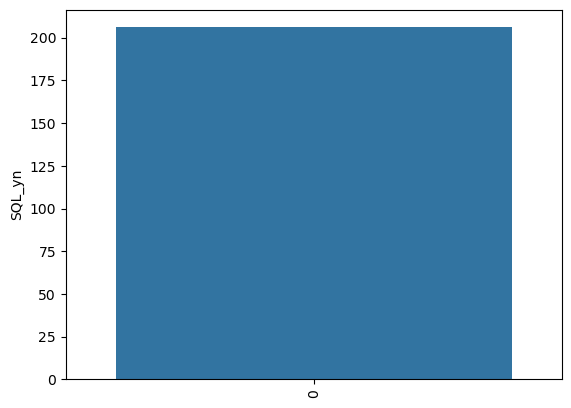

graph for R_yn: total = 1


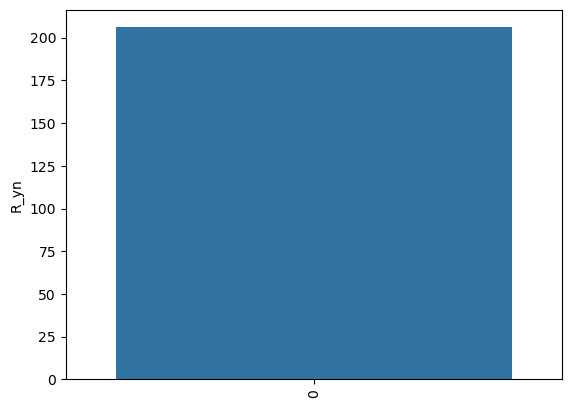

graph for excel_yn: total = 2


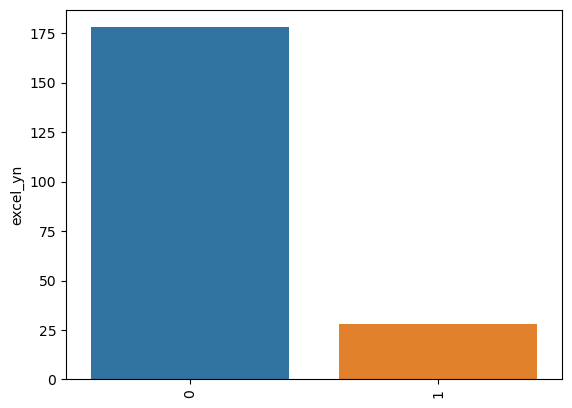

graph for aws_yn: total = 2


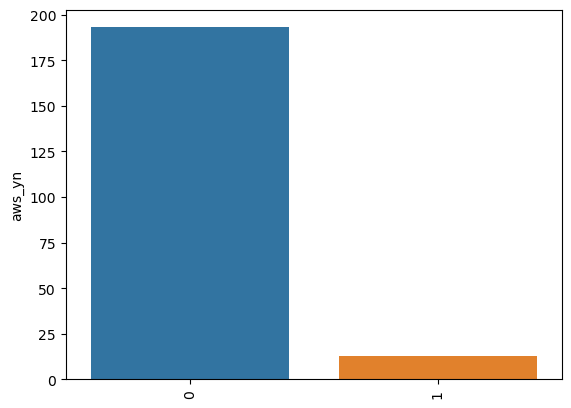

graph for job_simp_col: total = 4


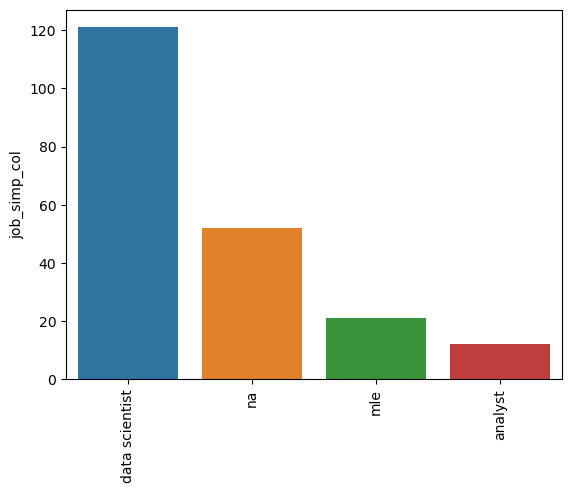

graph for seniority: total = 3


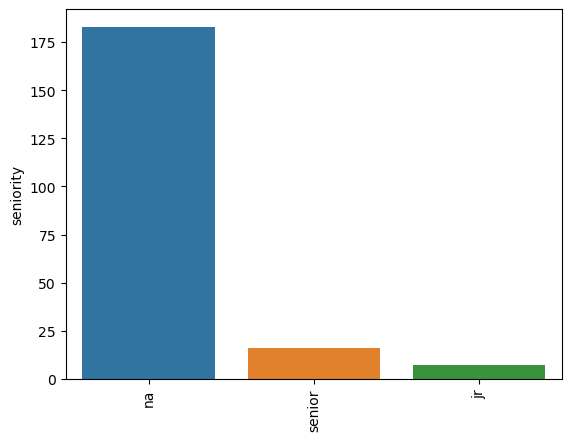

In [64]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    g = sns.barplot(x=cat_num.index,y=cat_num,data=df_cat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 6


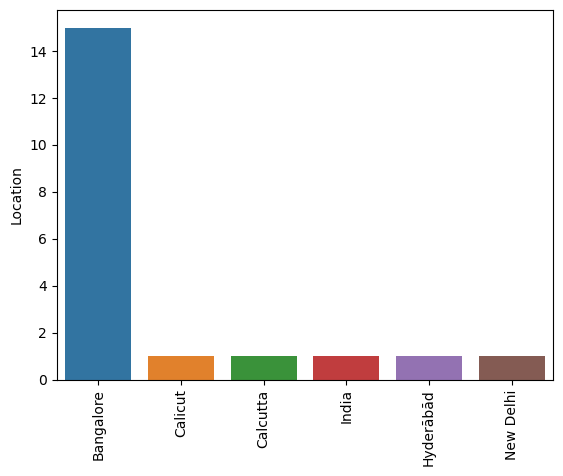

graph for company_txt: total = 19


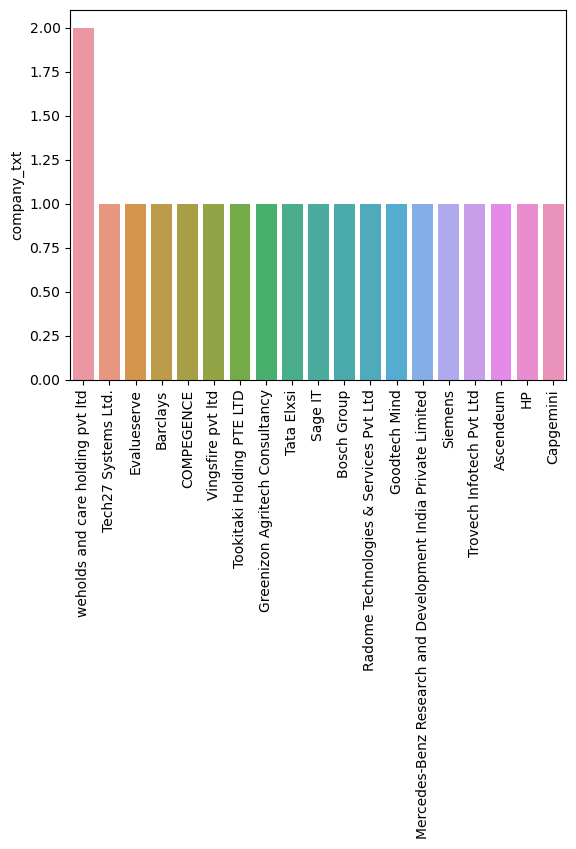

In [67]:
for i in ['Location','company_txt']:
    cat_num = df_cat[i][:20].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    g = sns.barplot(x=cat_num.index,y=cat_num,data=df_cat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.show()

In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'SQL_yn', 'R_yn', 'excel_yn',
       'aws_yn', 'job_simp_col', 'seniority', 'desc_len'],
      dtype='object')

In [70]:
pd.pivot_table(df,index='job_simp_col',values='avg_salary')

,avg_salary
job_simp_col,
analyst,6.375000
data scientist,7.662107
mle,9.667857
na,4.119615


In [71]:
pd.pivot_table(df,index=['job_simp_col','seniority'],values='avg_salary')

avg_salary
job_simp_col   seniority            
analyst        na           6.375000
data scientist jr           9.285714
               na           7.828365
               senior       4.796500
mle            na           9.901250
               senior       5.000000
na             na           3.962128
               senior       5.600000

In [75]:
# pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [77]:
pd.pivot_table(df,index=['Location','job_simp_col'],values='avg_salary').sort_values('avg_salary',ascending=False)

avg_salary
Location           job_simp_col              
Thiruvananthapuram mle              24.500000
Coimbatore         data scientist   17.000000
Noida              analyst          12.000000
Ahmedabad          data scientist   11.750000
Pune               mle              11.000000
                   data scientist   11.000000
Bangalore          mle               9.500000
Hyderābād          data scientist    9.416667
Mumbai             mle               9.091667
Chennai            data scientist    9.000000
Noida              data scientist    8.312500
Mumbai             data scientist    7.875000
Bangalore          data scientist    7.799074
Surat              mle               7.550000
Jammu              data scientist    7.500000
Hyderābād          na                7.125000
Bangalore          analyst           6.055556
New Delhi          data scientist    6.000000
Gurgaon            data scientist    5.906250
Noida              mle               5.840000
Calcutta           data scientist    5.577500
Coimbatore         mle               5.500000
Gurgaon            na                5.003636
                   analyst           5.000000
New Delhi          na                5.000000
India              data scientist    5.000000
Calicut            data scientist    5.000000
Hyderābād          mle               5.000000
Visakhapatnam      na                5.000000
Chennai            na                4.500000
Bangalore          na                4.245000
Mumbai             na                4.000000
Chandigarh         data scientist    4.000000
Remote             data scientist    2.500000
Cochin             na                2.485000
Kālkāji Devi       mle               0.435000
                   na                0.380000
Noida              na                0.350000
Chandigarh         na                0.150000

In [82]:
pd.pivot_table(df[df['job_simp_col']=='data scientist'],index='Location',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Location,
Coimbatore,17.000000
Ahmedabad,11.750000
Pune,11.000000
Hyderābād,9.416667
Chennai,9.000000
Noida,8.312500
Mumbai,7.875000
Bangalore,7.799074
Jammu,7.500000


In [83]:
# rating, industry, secotr, revenue, number of comp, hourly, employer provided, python, r, spakr, aws excel, desc_len, type of ownership

In [85]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'SQL_yn', 'R_yn', 'excel_yn',
       'aws_yn', 'job_simp_col', 'seniority', 'desc_len'],
      dtype='object')

In [89]:
df_pivots= df[['Rating', 'Industry', 'Sector', 'Revenue', 'employer_provided', 'python_yn', 
                'R_yn', 'SQL_yn', 'aws_yn', 'excel_yn', 'desc_len', 'Type of ownership','avg_salary']]

In [91]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 4.7     10.000000
 4.3      9.750000
 3.5      8.618056
 2.8      8.000000
 4.0      6.653125
 4.1      6.312500
-1.0      6.169057
 4.5      5.750000
 3.9      5.642857
 5.0      5.600000
 2.4      5.500000
 3.6      5.500000
 4.6      5.500000
 4.9      5.500000
 4.2      5.125000
 3.4      5.000000
 4.4      4.833333
 3.8      2.000000
 3.7      0.416667
Industry
                                         avg_salary
Industry                                           
Software Development                      10.000000
Business Consulting                        8.900000
Internet & Web Services                    8.808219
Food & Beverage Manufacturing              8.500000
Electronics Manufacturing                  7.500000
Accounting & Tax                           6.500000
Enterprise Software & Network Solutions    6.083333
Department, Clothing & Shoe Stores         6.000000
Information Technology Support Services    5.900000
-1           

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [92]:
pd.pivot_table(df_pivots,index= 'Revenue', columns= 'python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $5 million (USD),1.0,NaN
$10+ billion (USD),28.0,4.0
$100 to $500 million (USD),4.0,NaN
$2 to $5 billion (USD),3.0,NaN
$25 to $50 million (USD),NaN,1.0
$5 to $25 million (USD),2.0,NaN
-1,37.0,14.0
Unknown / Non-Applicable,76.0,36.0


In [93]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

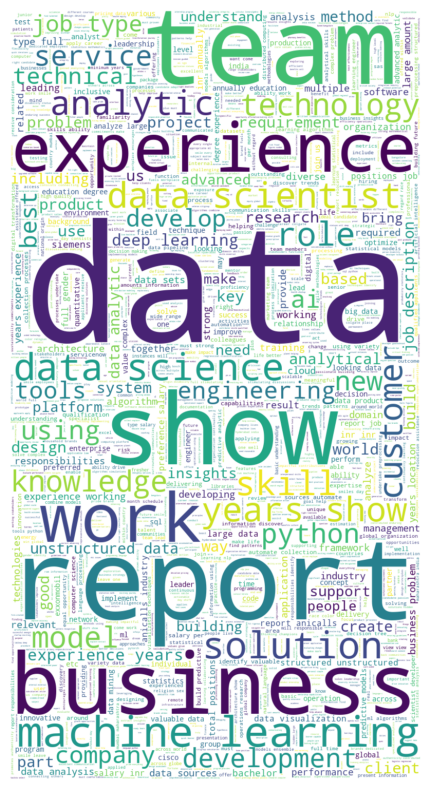

In [97]:
words = " ".join(df['Job Description'])

def punctuation_stop (text):
    """ remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white",random_state=1, stopwords=STOPWORDS, max_words = 2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()